In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

#The part read in the dataset
data = pd.read_csv(r'C:\Users\Gilbert\Documents\BCB_Research\Kcat_Benchmark_ML_Models\Data\test_transferase.csv')
onehot_encoded_smiles = pd.get_dummies(data['smiles'].apply(list).apply(pd.Series).stack()).groupby(level=0).sum()

X = onehot_encoded_smiles
y = np.log10(data["kcat"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVR()
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred= svm_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
result = np.corrcoef(y_test, y_pred)[0,1]
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 
print('r2:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mse))
print("pearson:", result)



MAE:  1.175904542666594
MSE:  2.242203897766559
r2: 0.1567980531694506
RMSE: 1.497399044265275
pearson: 0.40646085755392497


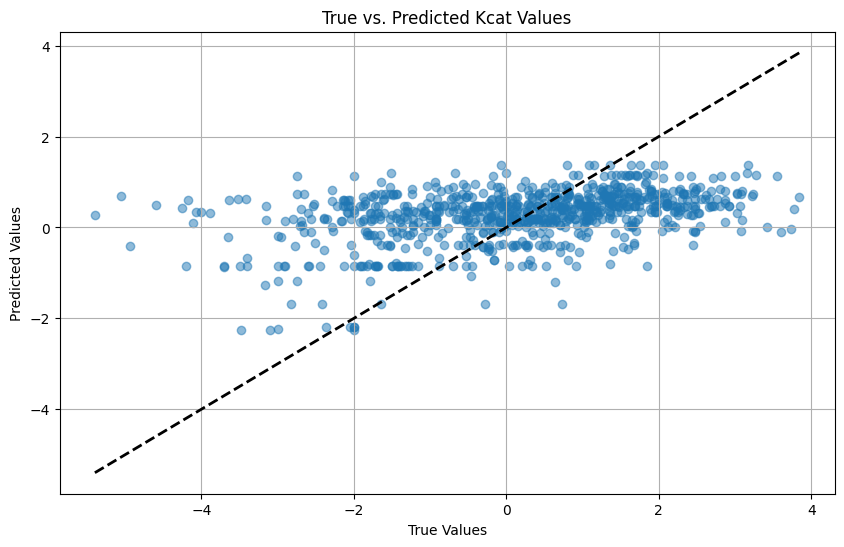

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Kcat Values')
plt.grid(True)
plt.show()